# LIBRARIES


In [19]:
import pandas as pd
import nltk
import json
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# INISIASI DATASET


In [20]:
# import
PREPROCESSED_DATASET_FILE_NAME = "ind-preprocessed.csv"
PREPROCESSED_DATASET_FILE_PATH = f"outputs/{PREPROCESSED_DATASET_FILE_NAME}"
DATA_FRAME_PREPROCESSED_DATASET = pd.read_csv(PREPROCESSED_DATASET_FILE_PATH)
DATA_FRAME_PREPROCESSED_DATASET_LENGTH = len(DATA_FRAME_PREPROCESSED_DATASET)
print(f"pre-processed dataset: {DATA_FRAME_PREPROCESSED_DATASET_LENGTH} tweets")
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

pre-processed dataset: 4042 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,False,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...


# INISIASI LEKSIKON


In [21]:
# InSet
with open("./dictionaries/lexicon/lexicon_json_inset-neg.txt") as f:
  inset_neg = f.read()
with open("./dictionaries/lexicon/lexicon_json_inset-pos.txt") as f:
  inset_pos = f.read()

insetNeg = json.loads(inset_neg)
insetPos = json.loads(inset_pos)

# sentistrength_id
with open("./dictionaries/lexicon/lexicon_json_sentiwords_id.txt") as f:
  sentistrength_id = f.read()

sentistrength = json.loads(sentistrength_id)

# SENTIMENT LABELLING


InSet Lexicon


In [22]:
# inisiasi vader sentiment analyzer
sia_inset_neg = SentimentIntensityAnalyzer()
sia_inset_pos = SentimentIntensityAnalyzer()


# clear default lexicon
sia_inset_neg.lexicon.clear()
sia_inset_pos.lexicon.clear()

# assign InSet lexicon
sia_inset_neg.lexicon.update(insetNeg)
sia_inset_pos.lexicon.update(insetPos)

In [23]:
# polarity score
def get_inset_compound_score(text):
  inset_compound_score = sia_inset_neg.polarity_scores(text)["compound"] + sia_inset_pos.polarity_scores(text)["compound"]
  return inset_compound_score

DATA_FRAME_PREPROCESSED_DATASET["inset_compound_score"] = DATA_FRAME_PREPROCESSED_DATASET["ind_preprocessed_text"].apply(get_inset_compound_score)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,False,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...,0.1095


In [24]:
# labelling
def get_inset_label(number):
  if number < 0:
    return "negatif"
  elif number == 0:
    return "netral"
  elif number > 0:
    return "positif"
  else:
    return

DATA_FRAME_PREPROCESSED_DATASET["inset_label"] = DATA_FRAME_PREPROCESSED_DATASET["inset_compound_score"].apply(get_inset_label)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score,inset_label
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,False,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...,0.1095,positif


sentistrength_id


In [25]:
# inisiasi vader sentiment analyzer
sia_sentistrength = SentimentIntensityAnalyzer()

# clear default lexicon
sia_sentistrength.lexicon.clear()

# assign sentistrength lexicon
sia_sentistrength.lexicon.update(sentistrength)

In [26]:
# polarity score
def get_sentistrength_compound_score(text):
  sentistrength_compound_score = sia_sentistrength.polarity_scores(text)["compound"]
  return sentistrength_compound_score

DATA_FRAME_PREPROCESSED_DATASET["sentistrength_compound_score"] = DATA_FRAME_PREPROCESSED_DATASET["ind_preprocessed_text"].apply(get_sentistrength_compound_score)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score,inset_label,sentistrength_compound_score
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,False,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...,0.1095,positif,0.875


In [27]:
# labelling
def get_sentistrength_label(number):
  if number < 0:
    return "negatif"
  elif number == 0:
    return "netral"
  elif number > 0:
    return "positif"
  else:
    return

DATA_FRAME_PREPROCESSED_DATASET["sentistrength_label"] = DATA_FRAME_PREPROCESSED_DATASET["sentistrength_compound_score"].apply(get_sentistrength_label)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score,inset_label,sentistrength_compound_score,sentistrength_label
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,False,dukung pemindahan kota nusantara mengoptimalka...,dukung pindah kota nusantara optimal guna sumb...,dukung pindah kota nusantara optimal guna sumb...,0.1095,positif,0.875,positif


# EXPORT


In [28]:
DATA_FRAME_PREPROCESSED_DATASET.to_csv("outputs/ind-sentiment.csv", index=False)

# FRESH DATASET VS CURRENT DATASET TOTAL DATA


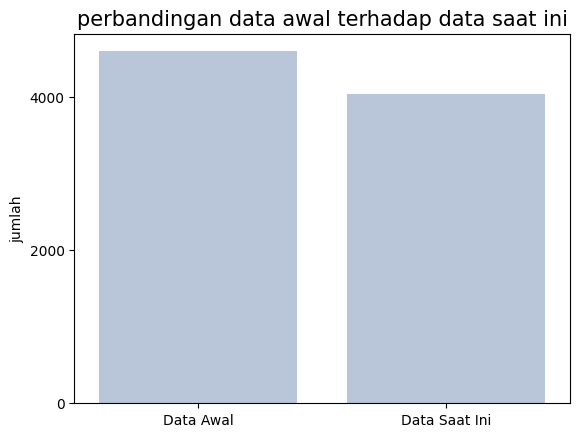

In [29]:
fresh_dataset = pd.read_csv("datasets/merged/merged_dataset.csv")
current_dataset = pd.read_csv("outputs/ind-sentiment.csv")

vol = [['Data Awal', len(fresh_dataset)],
       ['Data Saat Ini', len(current_dataset)]]
df = pd.DataFrame(vol, columns=['dt_type', 'dt_vol'])
sns.set_palette('PuBu',2)
ax = sns.barplot(data=df.reset_index(), x='dt_type', y='dt_vol')
ax.set_ylabel('jumlah')
ax.set_xlabel('')
ax.set_title('perbandingan data awal terhadap data saat ini', fontsize=15)
ax.yaxis.set_ticks(np.arange(0, 5000, 2000))
plt.show()

# PIE CHART InSet VS sentistrength_id


inset_label
negatif    2592
positif    1130
netral      320
Name: count, dtype: int64


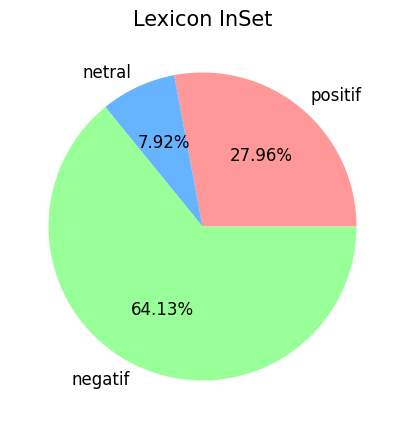

sentistrength_label
netral     1834
positif    1486
negatif     722
Name: count, dtype: int64


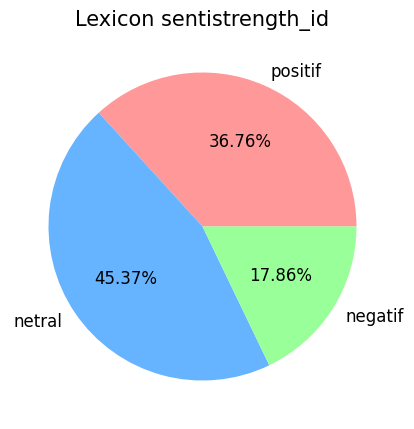

In [30]:
# InSet
inset_label	= DATA_FRAME_PREPROCESSED_DATASET["inset_label"]
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon InSet', fontsize=15)
plt.show()

# sentistrength_id
sentistrength_label = DATA_FRAME_PREPROCESSED_DATASET["sentistrength_label"]
sentistrength_label_counts = sentistrength_label.value_counts()
print(sentistrength_label_counts)

positif_sentistrength_perc = sentistrength_label_counts.positif / sentistrength_label_counts.sum() * 100
netral_sentistrength_perc = sentistrength_label_counts.netral / sentistrength_label_counts.sum() * 100
negatif_sentistrength_perc = sentistrength_label_counts.negatif / sentistrength_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_sentistrength_perc, netral_sentistrength_perc, negatif_sentistrength_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon sentistrength_id', fontsize=15)
plt.show()

# DIAGRAM InSet VS sentistrength_id


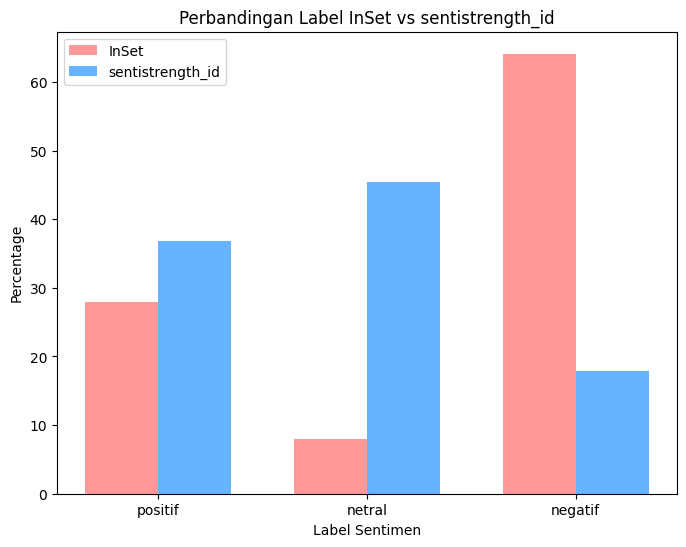

In [31]:
# Data
inset_labels = ['positif', 'netral', 'negatif']
inset_percents = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]

sentistrength_labels = ['positif', 'netral', 'negatif']
sentistrength_percents = [positif_sentistrength_perc, netral_sentistrength_perc, negatif_sentistrength_perc]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(inset_labels))

ax.bar(index, inset_percents, bar_width, label='InSet', color='#ff9999')
ax.bar(index + bar_width, sentistrength_percents, bar_width, label='sentistrength_id', color='#66b3ff')

ax.set_xlabel('Label Sentimen')
ax.set_ylabel('Percentage')
ax.set_title('Perbandingan Label InSet vs sentistrength_id')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(inset_labels)
ax.legend()

plt.show()
